<a href="https://colab.research.google.com/github/choco721/ALGORITMIA/blob/correccion/Algoritmia_chb10_38_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CHB10_38**

##**Importación de librerías**

In [7]:
pip install pyEDFlib

In [8]:
from pyedflib import highlevel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Detección del bloque

In [9]:
edf_name = "chb10_38.edf"   # Definimos el nombre del archivo EDF que queremos buscar
summary_file = "/content/chb10-summary.txt"

with open(summary_file, "r") as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if edf_name in line:
        print("Bloque detectado:\n")
        for j in range(i, i+10):   # muestra las 10 líneas siguientes
            print(lines[j].strip())

Bloque detectado:

File Name: chb10_38.edf
File Start Time: 14:33:05
File End Time: 16:33:05
Number of Seizures in File: 1
Seizure 1 Start Time: 4618 seconds
Seizure 1 End Time: 4707 seconds

File Name: chb10_89.edf
File Start Time: 16:21:55
File End Time: 18:21:55


In [10]:
antes, despues = 4618 - 120, 4707 + 120
comienzo, final = 4618, 4707

##**Cantidad de canales**

In [11]:
filename = "chb10_38.edf"

signals, signal_headers, header = highlevel.read_edf(filename)

print(f"Número de canales: {len(signals)}")
print(f"Etiquetas de los canales: {[h['label'] for h in signal_headers]}")

Número de canales: 23
Etiquetas de los canales: ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8']


##**Frecuencia del muestreo (hz)**

In [12]:
labels = [h['label'] for h in signal_headers]
fs = [h['sample_frequency'] for h in signal_headers]

for label, f in zip(labels, fs):
    print(f"Canal: {label} - Frecuencia de muestreo: {f} Hz")

Canal: FP1-F7 - Frecuencia de muestreo: 256.0 Hz
Canal: F7-T7 - Frecuencia de muestreo: 256.0 Hz
Canal: T7-P7 - Frecuencia de muestreo: 256.0 Hz
Canal: P7-O1 - Frecuencia de muestreo: 256.0 Hz
Canal: FP1-F3 - Frecuencia de muestreo: 256.0 Hz
Canal: F3-C3 - Frecuencia de muestreo: 256.0 Hz
Canal: C3-P3 - Frecuencia de muestreo: 256.0 Hz
Canal: P3-O1 - Frecuencia de muestreo: 256.0 Hz
Canal: FP2-F4 - Frecuencia de muestreo: 256.0 Hz
Canal: F4-C4 - Frecuencia de muestreo: 256.0 Hz
Canal: C4-P4 - Frecuencia de muestreo: 256.0 Hz
Canal: P4-O2 - Frecuencia de muestreo: 256.0 Hz
Canal: FP2-F8 - Frecuencia de muestreo: 256.0 Hz
Canal: F8-T8 - Frecuencia de muestreo: 256.0 Hz
Canal: T8-P8 - Frecuencia de muestreo: 256.0 Hz
Canal: P8-O2 - Frecuencia de muestreo: 256.0 Hz
Canal: FZ-CZ - Frecuencia de muestreo: 256.0 Hz
Canal: CZ-PZ - Frecuencia de muestreo: 256.0 Hz
Canal: P7-T7 - Frecuencia de muestreo: 256.0 Hz
Canal: T7-FT9 - Frecuencia de muestreo: 256.0 Hz
Canal: FT9-FT10 - Frecuencia de mue

In [13]:
signals, signal_headers, header

(array([[  53.04029304,    0.29304029,    0.29304029, ...,  101.0989011 ,
           99.34065934,   96.41025641],
        [  10.84249084,    0.29304029,    0.29304029, ...,  -10.84249084,
          -13.18681319,  -16.11721612],
        [-133.91941392,    0.29304029,    0.29304029, ...,   68.27838828,
           72.96703297,   64.76190476],
        ...,
        [ -12.01465201,    0.29304029,    0.29304029, ...,    0.29304029,
            2.05128205,   -1.46520147],
        [  56.55677656,    0.29304029,    0.29304029, ...,   31.35531136,
           26.66666667,   14.94505495],
        [ -53.62637363,    0.29304029,    0.29304029, ...,  -51.28205128,
          -50.6959707 ,  -36.04395604]]),
 [{'label': 'FP1-F7',
   'dimension': 'uV',
   'sample_frequency': 256.0,
   'physical_max': 1200.0,
   'physical_min': -1200.0,
   'digital_max': 2047,
   'digital_min': -2048,
   'prefilter': '',
   'transducer': ''},
  {'label': 'F7-T7',
   'dimension': 'uV',
   'sample_frequency': 256.0,
   'phys

In [14]:
df = pd.DataFrame(data=signals.T, columns=labels)

In [15]:
df

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8
0,53.040293,10.842491,-133.919414,133.919414,-47.179487,50.695971,-4.395604,64.761905,-118.681319,44.249084,...,118.681319,-53.626374,-123.956044,-44.835165,113.406593,134.505495,-119.853480,-12.014652,56.556777,-53.626374
1,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,...,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040
2,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,...,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040
3,0.293040,0.293040,0.293040,0.293040,0.879121,0.293040,0.293040,0.293040,0.879121,0.293040,...,0.293040,-0.293040,1.465201,0.293040,-0.293040,0.293040,0.879121,0.293040,-0.293040,-0.293040
4,0.293040,0.293040,-0.293040,-0.293040,-0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,...,0.879121,0.293040,-0.293040,0.293040,0.293040,0.879121,-0.879121,0.293040,0.879121,0.293040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843195,92.307692,-0.879121,53.626374,-28.424908,34.285714,-17.289377,23.736264,74.725275,46.007326,-55.384615,...,47.179487,-27.838828,-19.047619,-130.989011,116.923077,-53.040293,-10.256410,-9.084249,48.937729,-27.838828
1843196,97.582418,-6.153846,59.487179,-27.838828,30.769231,4.981685,19.047619,65.347985,27.838828,-53.040293,...,34.285714,-33.699634,-12.014652,-120.439560,116.923077,-58.901099,-7.912088,2.051282,27.252747,-33.699634
1843197,101.098901,-10.842491,68.278388,-31.941392,21.978022,27.252747,16.117216,57.142857,8.498168,-51.868132,...,30.183150,-51.282051,0.879121,-107.545788,116.336996,-67.692308,-11.428571,0.293040,31.355311,-51.282051
1843198,99.340659,-13.186813,72.967033,-30.769231,11.428571,49.523810,12.600733,51.282051,-3.809524,-54.798535,...,20.219780,-50.695971,10.256410,-91.135531,115.750916,-72.380952,-23.150183,2.051282,26.666667,-50.695971


##**Conversión a tiempo en segundos**

In [16]:
df.index = df.index / 256
display(df)

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8
0.000000,53.040293,10.842491,-133.919414,133.919414,-47.179487,50.695971,-4.395604,64.761905,-118.681319,44.249084,...,118.681319,-53.626374,-123.956044,-44.835165,113.406593,134.505495,-119.853480,-12.014652,56.556777,-53.626374
0.003906,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,...,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040
0.007812,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,...,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040
0.011719,0.293040,0.293040,0.293040,0.293040,0.879121,0.293040,0.293040,0.293040,0.879121,0.293040,...,0.293040,-0.293040,1.465201,0.293040,-0.293040,0.293040,0.879121,0.293040,-0.293040,-0.293040
0.015625,0.293040,0.293040,-0.293040,-0.293040,-0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,...,0.879121,0.293040,-0.293040,0.293040,0.293040,0.879121,-0.879121,0.293040,0.879121,0.293040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7199.980469,92.307692,-0.879121,53.626374,-28.424908,34.285714,-17.289377,23.736264,74.725275,46.007326,-55.384615,...,47.179487,-27.838828,-19.047619,-130.989011,116.923077,-53.040293,-10.256410,-9.084249,48.937729,-27.838828
7199.984375,97.582418,-6.153846,59.487179,-27.838828,30.769231,4.981685,19.047619,65.347985,27.838828,-53.040293,...,34.285714,-33.699634,-12.014652,-120.439560,116.923077,-58.901099,-7.912088,2.051282,27.252747,-33.699634
7199.988281,101.098901,-10.842491,68.278388,-31.941392,21.978022,27.252747,16.117216,57.142857,8.498168,-51.868132,...,30.183150,-51.282051,0.879121,-107.545788,116.336996,-67.692308,-11.428571,0.293040,31.355311,-51.282051
7199.992188,99.340659,-13.186813,72.967033,-30.769231,11.428571,49.523810,12.600733,51.282051,-3.809524,-54.798535,...,20.219780,-50.695971,10.256410,-91.135531,115.750916,-72.380952,-23.150183,2.051282,26.666667,-50.695971


##**Dataframe comienzo:final**

In [17]:
df[comienzo : final]

/tmp/ipython-input-2382652556.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df[comienzo : final]


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8
4618.000000,54.212454,228.278388,-42.490842,-70.622711,-189.597070,186.080586,232.967033,-58.901099,-273.406593,128.644689,...,80.586081,115.750916,-33.699634,51.868132,275.164835,43.076923,-55.384615,-94.652015,-41.318681,115.750916
4618.003906,29.010989,231.794872,-50.695971,-80.586081,-213.040293,181.391941,224.761905,-61.831502,-238.241758,132.747253,...,112.820513,112.234432,-60.073260,50.109890,259.926740,51.282051,-49.523810,-79.413919,-51.282051,112.234432
4618.007812,9.670330,226.520147,-60.659341,-70.622711,-230.036630,189.597070,212.454212,-65.934066,-206.593407,143.296703,...,122.197802,107.545788,-67.692308,47.179487,245.274725,61.245421,-57.142857,-56.556777,-50.109890,107.545788
4618.011719,26.080586,189.010989,-44.835165,-78.827839,-230.036630,194.285714,205.421245,-77.069597,-220.659341,156.190476,...,138.608059,58.901099,-58.901099,40.732601,230.622711,45.421245,-21.391941,-60.659341,-20.805861,58.901099
4618.015625,5.567766,175.531136,-24.908425,-89.377289,-255.238095,197.216117,202.490842,-77.655678,-259.926740,171.428571,...,149.157509,7.912088,-48.351648,34.871795,217.142857,25.494505,-16.703297,-48.351648,5.567766,7.912088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706.984375,-133.919414,12.600733,108.131868,-108.717949,-60.659341,18.461538,2.051282,-81.172161,145.054945,53.040293,...,89.377289,-47.179487,-87.619048,70.622711,-76.483516,-107.545788,-14.945055,113.406593,118.681319,-47.179487
4706.988281,-131.575092,16.117216,90.549451,-101.684982,-50.695971,16.117216,-0.879121,-88.791209,140.366300,51.868132,...,74.139194,-53.626374,-79.413919,70.622711,-78.827839,-89.963370,-9.084249,114.578755,106.373626,-53.626374
4706.992188,-132.747253,47.179487,-12.014652,-14.945055,-31.355311,17.289377,-10.256410,-86.446886,143.296703,48.937729,...,68.278388,-55.970696,-74.139194,75.897436,-77.655678,12.600733,-7.912088,84.102564,115.164835,-55.970696
4706.996094,-139.194139,47.179487,-17.875458,-4.395604,-31.355311,16.117216,-12.014652,-84.102564,142.710623,45.421245,...,63.589744,-38.974359,-74.139194,83.516484,-79.413919,18.461538,9.670330,76.483516,95.824176,-38.974359


###**Dataframe before(antes)**

In [18]:
df[antes:comienzo].describe()

/tmp/ipython-input-3352630902.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df[antes:comienzo].describe()


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8
count,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,...,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000
mean,0.488528,0.515332,0.306776,0.178308,0.278885,0.550759,0.518460,0.108408,0.675735,0.299622,...,0.290121,0.472617,0.401858,0.648741,0.527064,0.279304,0.130233,0.034216,0.290198,0.472617
std,84.296385,96.981853,71.063990,88.875249,126.655003,112.859151,73.318523,89.898971,120.169514,78.021279,...,69.769769,69.671011,63.450158,113.302334,89.738499,71.063990,47.267605,90.434811,44.524776,69.671011
min,-382.417582,-486.739927,-516.630037,-391.794872,-446.886447,-517.216117,-327.912088,-367.179487,-434.578755,-320.879121,...,-334.358974,-378.901099,-266.959707,-482.637363,-391.794872,-265.201465,-252.307692,-475.018315,-422.271062,-378.901099
25%,-53.626374,-60.073260,-41.904762,-55.384615,-84.688645,-72.967033,-46.593407,-55.384615,-82.344322,-51.282051,...,-42.490842,-45.421245,-41.904762,-73.553114,-60.073260,-45.421245,-28.424908,-44.835165,-27.252747,-45.421245
50%,-4.395604,3.223443,0.293040,0.293040,-0.879121,1.465201,0.293040,0.293040,-0.293040,2.051282,...,2.637363,0.293040,-1.465201,-0.879121,-1.465201,0.293040,0.293040,1.465201,0.293040,0.293040
75%,49.523810,61.831502,46.007326,55.970696,81.172161,77.655678,47.765568,55.970696,81.172161,53.040293,...,46.007326,44.249084,39.560440,75.311355,58.901099,42.490842,28.424908,46.593407,28.424908,44.249084
max,508.424908,552.380952,265.787546,637.948718,545.934066,400.586081,345.494505,333.186813,503.150183,276.923077,...,275.164835,346.666667,455.677656,450.989011,430.476190,517.216117,432.820513,451.575092,222.417582,346.666667


###**Dataframe crisis(durante)**

In [19]:
df[comienzo:final].describe()

/tmp/ipython-input-499910480.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df[comienzo:final].describe()


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8
count,22785.000000,22785.000000,22785.000000,22785.000000,22785.000000,22785.000000,22785.000000,22785.000000,22785.000000,22785.000000,...,22785.000000,22785.000000,22785.000000,22785.000000,22785.000000,22785.000000,22785.000000,22785.000000,22785.000000,22785.000000
mean,0.014392,0.194447,0.447348,0.389704,0.037953,0.338491,0.316705,0.505223,-0.691272,1.035306,...,0.400199,-1.024168,0.990807,-0.419105,0.712107,0.138733,-0.156944,1.254048,0.293863,-1.024168
std,127.082049,204.958103,249.253394,243.585526,175.843354,221.396694,158.143673,285.947954,243.653373,205.886485,...,131.105292,161.348042,130.999547,237.531128,188.921925,249.253394,142.235129,174.235617,98.469620,161.348042
min,-612.747253,-1032.380952,-1192.967033,-1448.498168,-915.750916,-1046.446886,-732.307692,-1448.498168,-1057.582418,-2055.677656,...,-1029.450549,-814.358974,-722.930403,-1306.080586,-1290.256410,-1090.989011,-669.010989,-773.919414,-1063.443223,-814.358974
25%,-70.622711,-119.853480,-132.747253,-125.714286,-94.065934,-121.611722,-78.241758,-140.952381,-136.263736,-98.168498,...,-73.553114,-89.377289,-70.036630,-128.058608,-88.205128,-135.091575,-81.172161,-94.652015,-44.835165,-89.377289
50%,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,-15.531136,-0.293040,0.293040,...,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040,0.293040
75%,76.483516,116.923077,135.677656,120.439560,102.271062,95.824176,74.139194,117.509158,105.787546,98.168498,...,80.586081,83.516484,68.864469,94.065934,101.098901,133.333333,73.553114,104.615385,47.765568,83.516484
max,635.604396,803.223443,1091.575092,1260.366300,660.805861,1100.952381,1068.131868,1288.498168,1800.146520,1707.545788,...,548.278388,1100.366300,807.912088,1246.886447,938.021978,1193.553114,607.472527,952.087912,615.091575,1100.366300


###**Dataframe after(después)**

In [20]:
df[final:despues].describe()

/tmp/ipython-input-2307751886.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df[final:despues].describe()


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8
count,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,...,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000,30721.000000
mean,0.355481,0.292830,0.077712,0.317364,0.240291,0.228844,-0.172375,0.675411,0.859376,-0.422233,...,0.402965,1.091282,-0.205684,0.485819,-0.108046,0.508368,0.744033,-0.180655,0.241264,1.091282
std,77.665431,112.582090,84.452857,117.581619,112.904908,133.082063,77.969774,117.723663,99.571958,92.992723,...,81.034231,67.771391,69.367180,135.095429,84.576972,84.452857,46.484938,68.353061,53.663704,67.771391
min,-428.717949,-460.366300,-578.168498,-1045.860806,-465.641026,-438.095238,-350.183150,-979.047619,-301.538462,-446.300366,...,-362.490842,-606.886447,-320.879121,-439.853480,-667.838828,-434.578755,-434.578755,-335.531136,-493.186813,-606.886447
25%,-47.765568,-72.967033,-45.421245,-57.142857,-66.520147,-75.897436,-43.076923,-58.315018,-66.520147,-59.487179,...,-47.765568,-40.146520,-41.904762,-84.688645,-48.937729,-50.109890,-26.666667,-41.318681,-27.252747,-40.146520
50%,-0.293040,-1.465201,1.465201,1.465201,-4.981685,3.809524,0.293040,6.739927,-1.465201,5.567766,...,0.293040,2.051282,0.879121,1.465201,2.051282,-0.879121,1.465201,-0.879121,-0.293040,2.051282
75%,46.007326,68.864469,50.695971,61.245421,58.315018,79.413919,45.421245,66.520147,66.520147,63.589744,...,48.937729,43.663004,41.904762,91.135531,52.454212,46.007326,30.183150,40.146520,26.080586,43.663004
max,424.615385,642.051282,435.164835,709.450549,443.369963,629.743590,374.212454,563.516484,436.923077,327.912088,...,421.098901,286.300366,753.992674,458.608059,276.336996,578.754579,418.168498,622.710623,428.717949,286.300366


##**Graficación de señales**

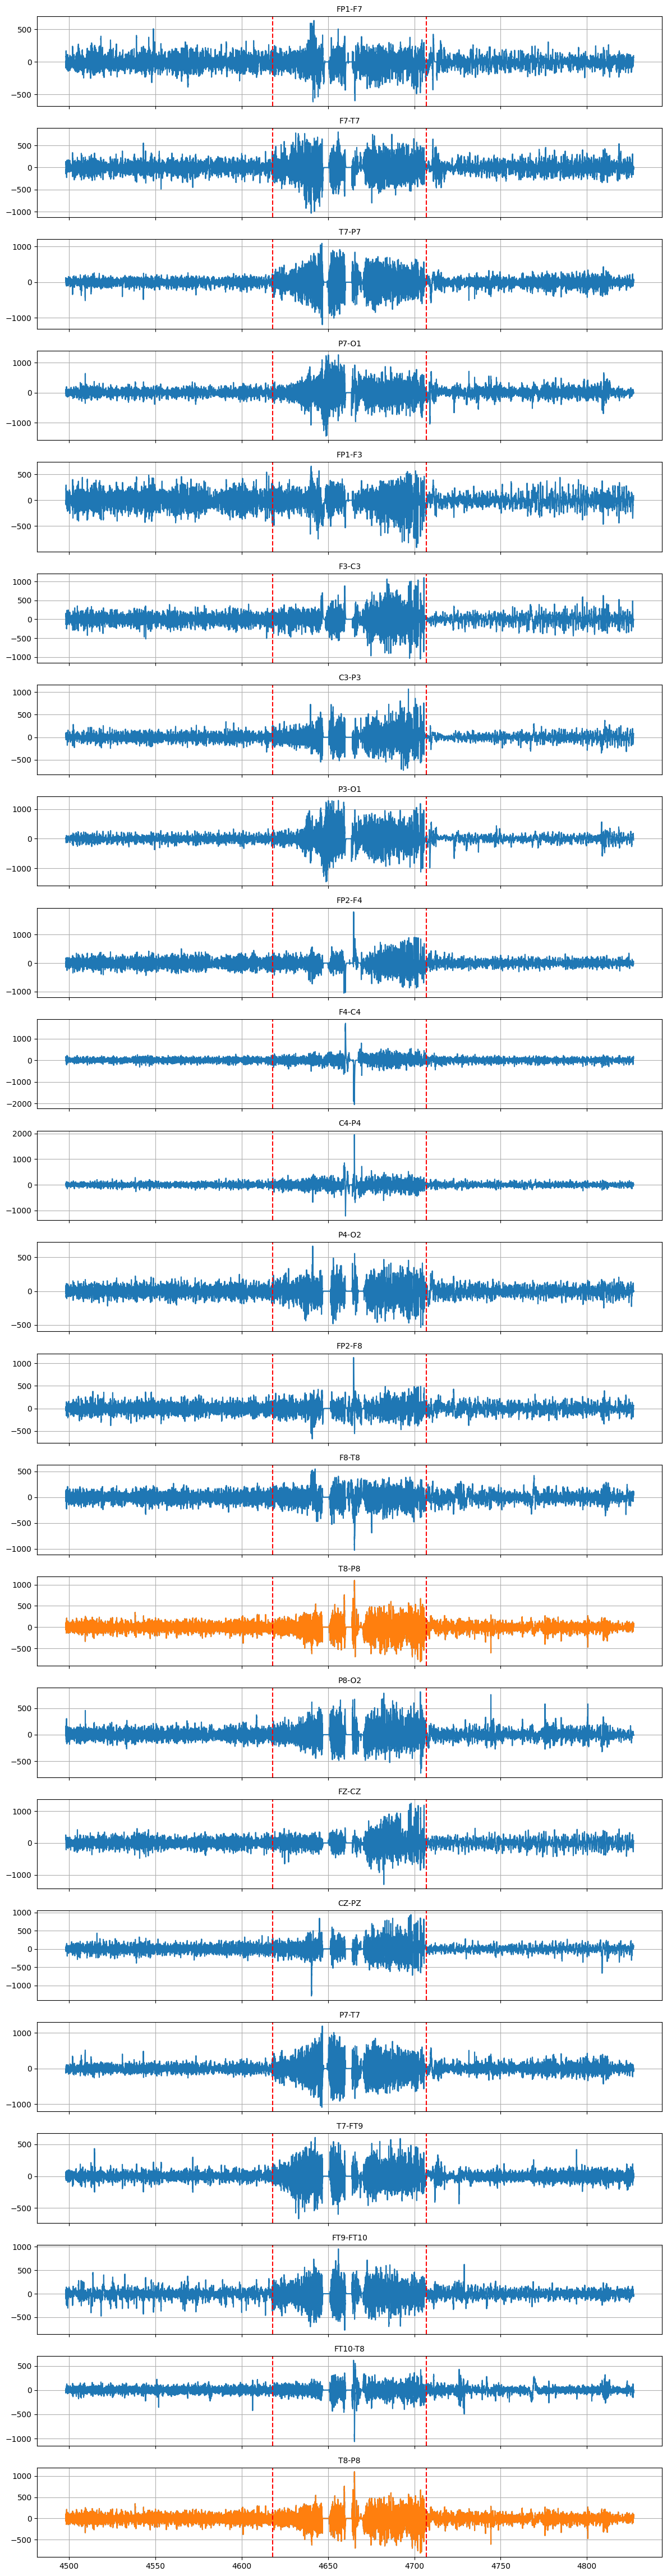

In [21]:
df_slice = df.loc[antes:despues]

num_cols = len(df_slice.columns)
fig, axes = plt.subplots(num_cols, 1, figsize=(12, num_cols * 2), sharex=True)

for i, col in enumerate(df_slice.columns):
    axes[i].plot(df_slice.index, df_slice[col])
    axes[i].set_title(col, fontsize=10)
    axes[i].grid(True)
    axes[i].axvline(x=comienzo, color='red', linestyle='--')
    axes[i].axvline(x=final, color='red', linestyle='--')

plt.tight_layout()
plt.show()

##**Segmentación y centrado del DF**

In [22]:
before = df[antes:comienzo]
crisis = df[comienzo:final]
after  = df[final:despues]

def centrar_segmento(df):
    return df - df.mean()

before_c = centrar_segmento(before)
crisis_c = centrar_segmento(crisis)
after_c  = centrar_segmento(after)

print("Media before:", before_c.mean().head())
print("Media crisis:", crisis_c.mean().head())
print("Media after:", after_c.mean().head())


Media before: FP1-F7    1.184199e-15
F7-T7     5.920997e-17
T7-P7    -1.835509e-15
P7-O1    -1.124989e-15
FP1-F3   -6.513096e-16
dtype: float64
Media crisis: FP1-F7    1.516822e-15
F7-T7     1.995819e-16
T7-P7     6.266872e-15
P7-O1    -4.789966e-16
FP1-F3    2.235317e-15
dtype: float64
Media after: FP1-F7    5.624947e-16
F7-T7     2.723658e-15
T7-P7     1.776299e-16
P7-O1    -2.368399e-16
FP1-F3   -7.697296e-16
dtype: float64


/tmp/ipython-input-4199919887.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  before = df[antes:comienzo]
/tmp/ipython-input-4199919887.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  crisis = df[comienzo:final]
/tmp/ipython-input-4199919887.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  after  = df[final:despues]


##**Escenario 1**

**Se caracterizan los tres bloques por separado, para detectar patrones que distinguen la crisis de la actividad normal.**

###**Función de los descriptores básicos**

In [23]:
#Función de descriptores básicos (media, varianza, std, PVA)
def calcular_descriptores_basicos(df):
    """
    Calcula descriptores básicos por canal:
    - media
    - varianza
    - desviación estándar
    - promedio de variación absoluta (PVA)
    """
    resultados = pd.DataFrame(index=df.columns)
    resultados["media"] = df.mean()
    resultados["varianza"] = df.var()
    resultados["std"] = df.std()
    resultados["pva"] = df.apply(lambda x: np.mean(np.abs(x)), axis=0)
    return resultados

####**Calcular descriptores básicos.**

In [24]:
res_before = calcular_descriptores_basicos(before_c)
res_crisis = calcular_descriptores_basicos(crisis_c)
res_after  = calcular_descriptores_basicos(after_c)

print("BEFORE (primeros canales):\n", res_before.head(), "\n")
print("CRISIS (primeros canales):\n", res_crisis.head(), "\n")
print("AFTER (primeros canales):\n", res_after.head())


BEFORE (primeros canales):
                media      varianza         std        pva
FP1-F7  1.184199e-15   7105.880564   84.296385  64.642147
F7-T7   5.920997e-17   9405.479753   96.981853  75.192303
T7-P7  -1.835509e-15   5050.090604   71.063990  54.477101
P7-O1  -1.124989e-15   7898.809912   88.875249  68.841985
FP1-F3 -6.513096e-16  16041.489868  126.655003  99.604003 

CRISIS (primeros canales):
                media      varianza         std         pva
FP1-F7  1.516822e-15  16149.847175  127.082049   93.670284
F7-T7   1.995819e-16  42007.823939  204.958103  150.552784
T7-P7   6.266872e-15  62127.254552  249.253394  181.555698
P7-O1  -4.789966e-16  59333.908664  243.585526  171.700748
FP1-F3  2.235317e-15  30920.885041  175.843354  129.739778 

AFTER (primeros canales):
                media      varianza         std        pva
FP1-F7  5.624947e-16   6031.919167   77.665431  58.959970
F7-T7   2.723658e-15  12674.726941  112.582090  87.370532
T7-P7   1.776299e-16   7132.285063   

###**Función Covarianza y Correlación de Pearson**

In [25]:
#Covarianza y Correlación de Pearson
def calcular_cov_corr(df):
    """
    Calcula matrices de covarianza y correlación de Pearson entre canales.
    """
    covarianza = df.cov()
    correlacion = df.corr(method="pearson")
    return covarianza, correlacion

####**Calcular Covarianza**

In [26]:
cov_b, corr_b = calcular_cov_corr(before_c)
cov_c, corr_c = calcular_cov_corr(crisis_c)
cov_a, corr_a = calcular_cov_corr(after_c)

print("Matriz de correlación - Crisis:\n", corr_c)


Matriz de correlación - Crisis:
             FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3  \
FP1-F7    1.000000  0.051968 -0.364919 -0.147508  0.409681  0.226010   
F7-T7     0.051968  1.000000 -0.361323 -0.323436 -0.218432  0.343998   
T7-P7    -0.364919 -0.361323  1.000000  0.267649 -0.066681  0.007925   
P7-O1    -0.147508 -0.323436  0.267649  1.000000  0.015290 -0.092354   
FP1-F3    0.409681 -0.218432 -0.066681  0.015290  1.000000 -0.267970   
F3-C3     0.226010  0.343998  0.007925 -0.092354 -0.267970  1.000000   
C3-P3    -0.211539  0.131455  0.417305  0.201262 -0.450889 -0.132035   
P3-O1    -0.270511 -0.055505  0.481873  0.738609 -0.177023 -0.260656   
FP2-F4    0.104112 -0.098309 -0.028450  0.037776  0.594247 -0.190659   
F4-C4     0.069402  0.157987  0.069811  0.045519 -0.115216  0.303600   
C4-P4     0.110720 -0.015541  0.102960  0.015729 -0.228097  0.241737   
P4-O2    -0.073610  0.147326  0.075648  0.156821 -0.324423  0.138761   
FP2-F8    0.013845  0.094354  0

###**Función Autocorrelación y Autocovarianza**

In [27]:
#Autocorrelación y Autocovarianza para cada canal
def autocorrelacion(x):
    """Autocorrelación normalizada de una serie 1D"""
    x = x - np.mean(x)
    result = np.correlate(x, x, mode="full")
    return result[result.size // 2:] / result[result.size // 2]

def autocovarianza(x):
    """Autocovarianza de una serie 1D"""
    x = x - np.mean(x)
    result = np.correlate(x, x, mode="full")
    return result[result.size // 2:] / len(x)


####**Calcular Autocorrelación y Autocovarianza**

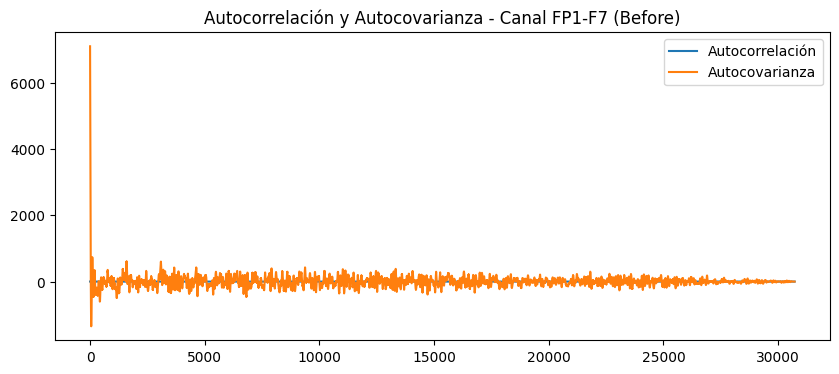

In [28]:
canal = before_c.columns[0]

auto_corr_before = autocorrelacion(before_c[canal].values)
auto_cov_before  = autocovarianza(before_c[canal].values)

plt.figure(figsize=(10,4))
plt.plot(auto_corr_before, label="Autocorrelación")
plt.plot(auto_cov_before, label="Autocovarianza")
plt.title(f"Autocorrelación y Autocovarianza - Canal {canal} (Before)")
plt.legend()
plt.show()


###**Función correlación y covarianza cruzada**

In [29]:
#Entre dos canales
def correlacion_cruzada(x, y):
    """Correlación cruzada entre dos series"""
    x = x - np.mean(x)
    y = y - np.mean(y)
    return np.correlate(x, y, mode="full")

def covarianza_cruzada(x, y):
    """Covarianza cruzada entre dos series"""
    x = x - np.mean(x)
    y = y - np.mean(y)
    return np.correlate(x, y, mode="full") / len(x)


####**Ejemplo entre dos canales**

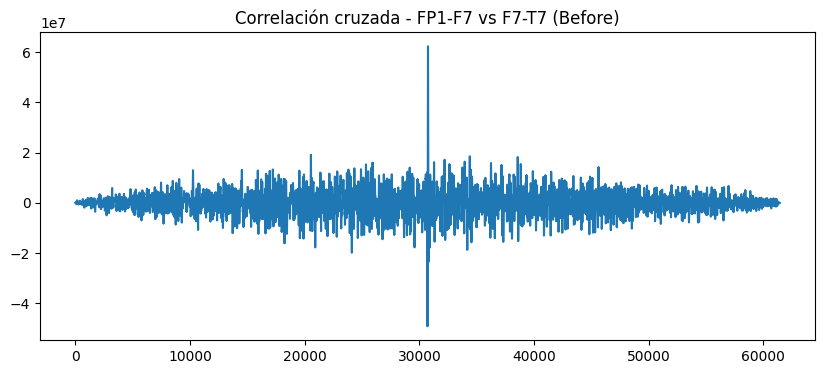

In [30]:
#Ejemplo entre dos canales
canal1, canal2 = before_c.columns[0], before_c.columns[1]

cross_corr = correlacion_cruzada(before_c[canal1].values,
                                 before_c[canal2].values)

plt.figure(figsize=(10,4))
plt.plot(cross_corr)
plt.title(f"Correlación cruzada - {canal1} vs {canal2} (Before)")
plt.show()


###**Función de análisis por segmento**



In [31]:
def analizar_segmento(df, nombre="segmento"):
    """
    Calcula descriptores estadísticos para un segmento de señales.
    Devuelve un DataFrame con resultados por canal.
    """
    resultados = calcular_descriptores_basicos(df)
    resultados["segmento"] = nombre
    return resultados

####**Aplicación en los tres bloques**

In [32]:
res_before = analizar_segmento(before_c, "before")
res_crisis = analizar_segmento(crisis_c, "crisis")
res_after  = analizar_segmento(after_c, "after")

# Unir en una sola tabla
resultados = pd.concat([res_before, res_crisis, res_after])
resultados.reset_index(inplace=True)
resultados.rename(columns={"index": "canal"}, inplace=True)

print(resultados.head(10))

    canal         media      varianza         std        pva segmento
0  FP1-F7  1.184199e-15   7105.880564   84.296385  64.642147   before
1   F7-T7  5.920997e-17   9405.479753   96.981853  75.192303   before
2   T7-P7 -1.835509e-15   5050.090604   71.063990  54.477101   before
3   P7-O1 -1.124989e-15   7898.809912   88.875249  68.841985   before
4  FP1-F3 -6.513096e-16  16041.489868  126.655003  99.604003   before
5   F3-C3 -1.509854e-15  12737.188015  112.859151  89.390023   before
6   C3-P3 -3.700623e-17   5375.605752   73.318523  57.156877   before
7   P3-O1 -1.657879e-15   8081.824985   89.898971  69.903858   before
8  FP2-F4  2.723658e-15  14440.712199  120.169514  95.630497   before
9   F4-C4  7.401246e-17   6087.320027   78.021279  61.905457   before


####**Comparación gráfica (varianza, std)**

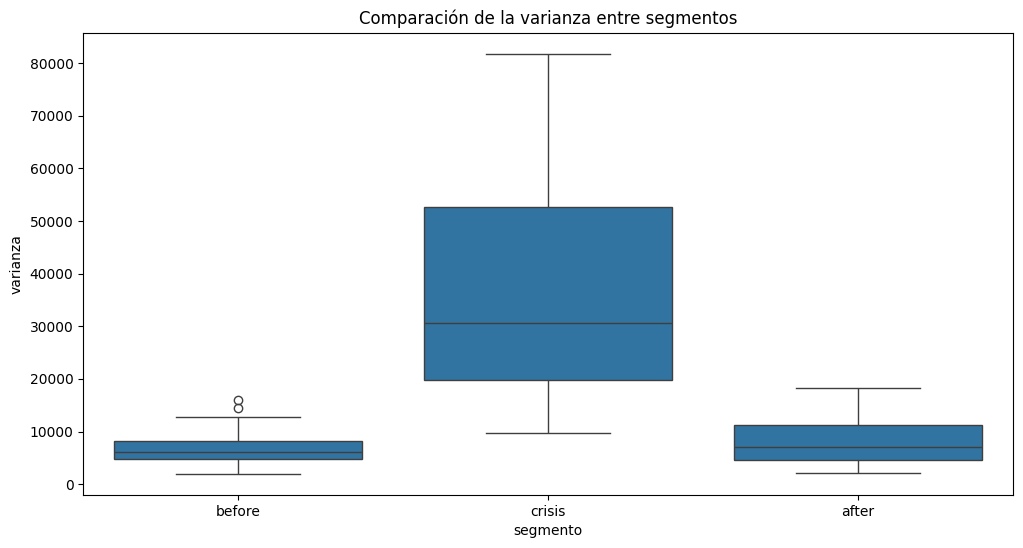

In [33]:
##Comparación gráfica (ejemplo con varianza)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=resultados, x="segmento", y="varianza")
plt.title("Comparación de la varianza entre segmentos")
plt.show()

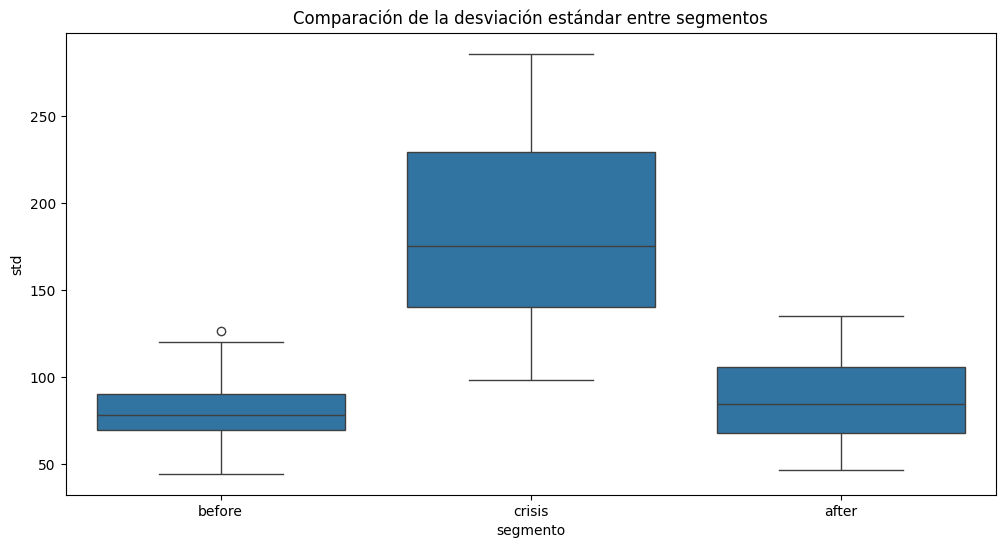

In [34]:
##Comparación gráfica (ejemplo con std)
plt.figure(figsize=(12,6))
sns.boxplot(data=resultados, x="segmento", y="std")
plt.title("Comparación de la desviación estándar entre segmentos")
plt.show()

###**Función para matrices**

In [35]:
#Función para matrices
def calcular_matrices(df, nombre="segmento"):
    """
    Calcula matrices de covarianza y correlación de Pearson
    para un segmento de señales.
    """
    cov = df.cov()
    corr = df.corr(method="pearson")
    return {"segmento": nombre, "cov": cov, "corr": corr}

In [36]:
mat_before = calcular_matrices(before_c, "before")
mat_crisis = calcular_matrices(crisis_c, "crisis")
mat_after  = calcular_matrices(after_c, "after")

####**Visualización (heatmap)**

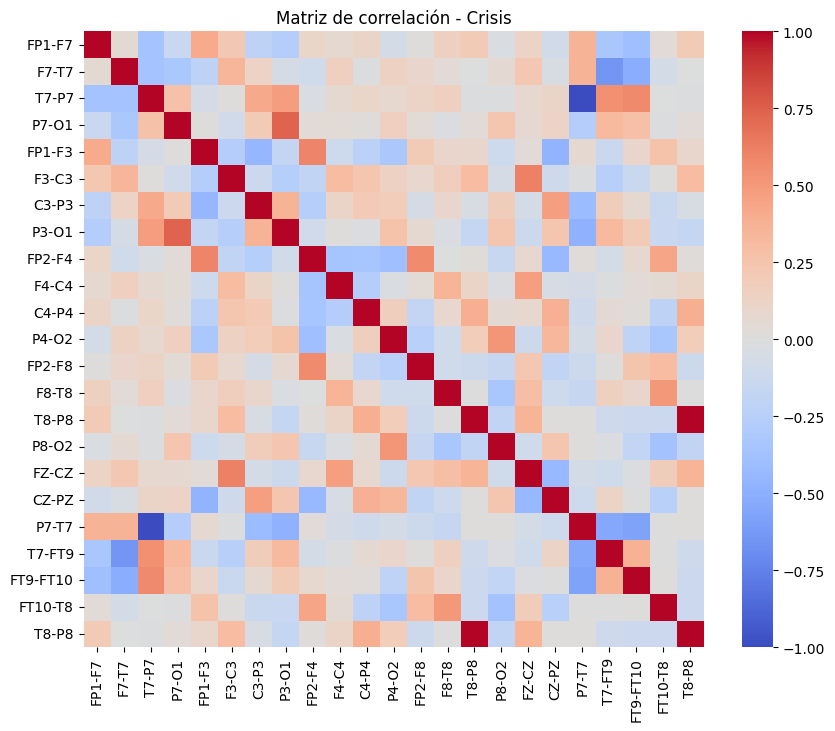

In [37]:
##Visualizar correlación (ejemplo con heatmap)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(mat_crisis["corr"], cmap="coolwarm", center=0,
            annot=False, cbar=True)
plt.title("Matriz de correlación - Crisis")
plt.show()

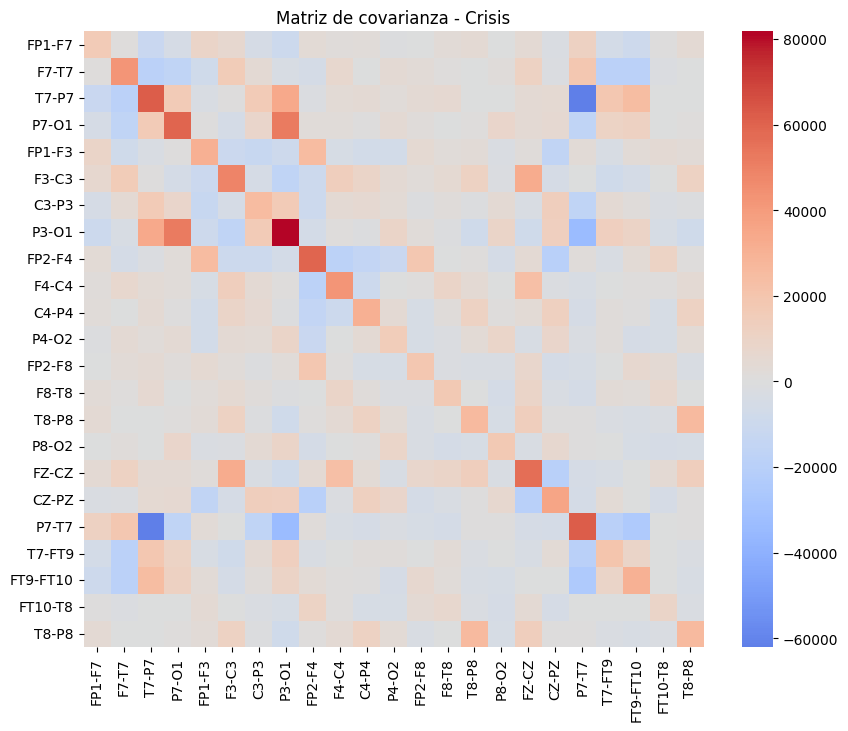

In [38]:
##Visualizar covarianza
plt.figure(figsize=(10,8))
sns.heatmap(mat_crisis["cov"], cmap="coolwarm", center=0,
            annot=False, cbar=True)
plt.title("Matriz de covarianza - Crisis")
plt.show()


###**Histogramas por descriptor**

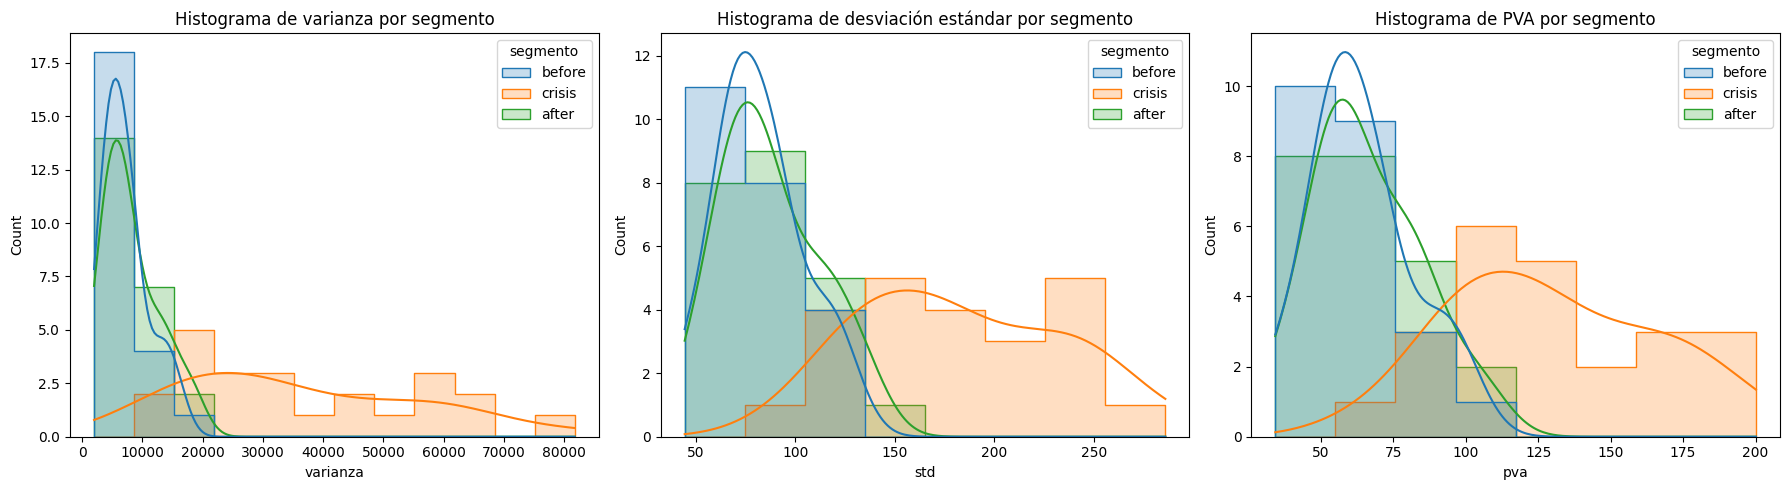

In [39]:
#Histogramas (varianza, std, pva) comparando before, crisis y after.
#pva= Promedio de variación absoluta
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Histograma de VARIANZA
sns.histplot(data=resultados, x="varianza", hue="segmento", kde=True,
             element="step", ax=axes[0])
axes[0].set_title("Histograma de varianza por segmento")

# Histograma de STD
sns.histplot(data=resultados, x="std", hue="segmento", kde=True,
             element="step", ax=axes[1])
axes[1].set_title("Histograma de desviación estándar por segmento")

# Histograma de PVA
sns.histplot(data=resultados, x="pva", hue="segmento", kde=True,
             element="step", ax=axes[2])
axes[2].set_title("Histograma de PVA por segmento")

plt.tight_layout()
plt.show()

###**Boxplots comparativos**

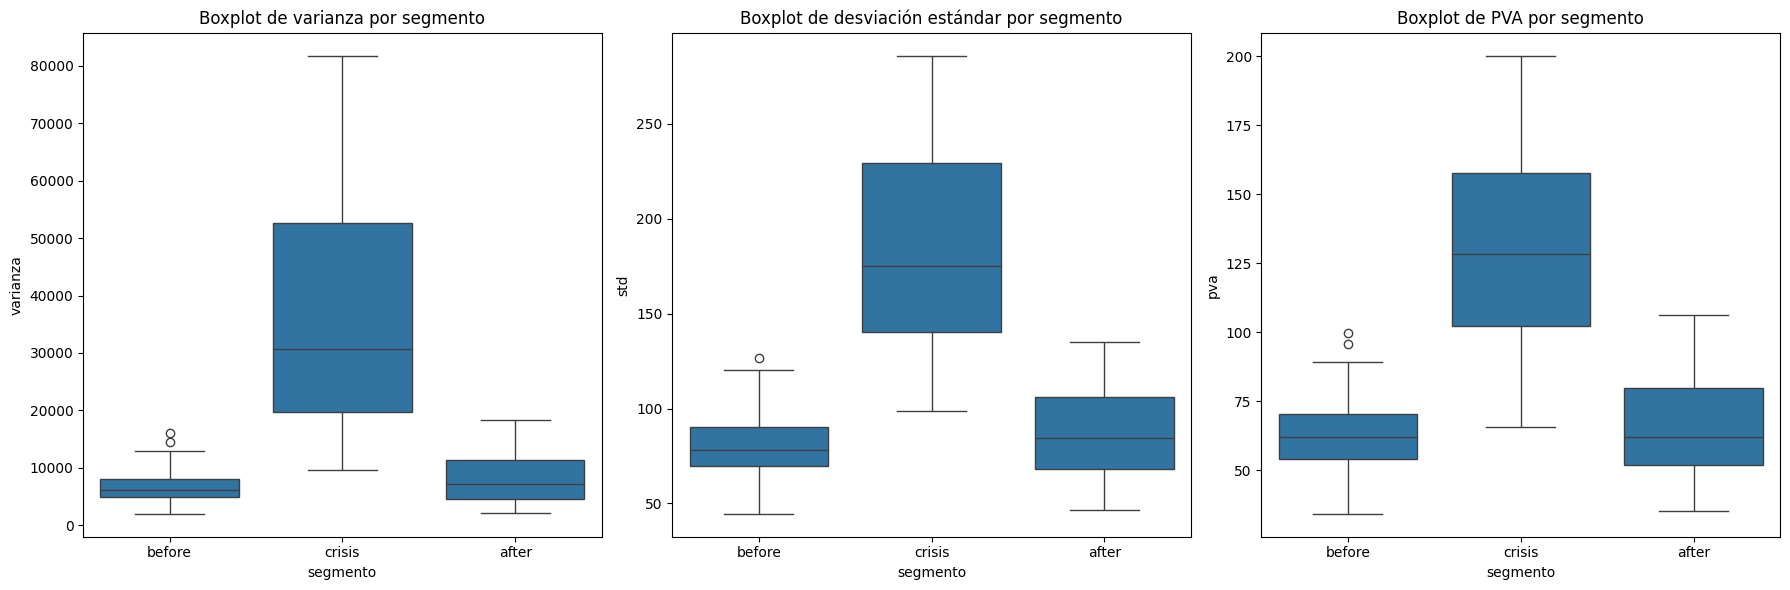

In [40]:
##Boxplots comparativos de Varianza, std, pva
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# Boxplot de VARIANZA
sns.boxplot(data=resultados, x="segmento", y="varianza", ax=axes[0])
axes[0].set_title("Boxplot de varianza por segmento")

# Boxplot de STD
sns.boxplot(data=resultados, x="segmento", y="std", ax=axes[1])
axes[1].set_title("Boxplot de desviación estándar por segmento")

# Boxplot de PVA
sns.boxplot(data=resultados, x="segmento", y="pva", ax=axes[2])
axes[2].set_title("Boxplot de PVA por segmento")

plt.tight_layout()
plt.show()


###**PDF (ajuste de distribuciones)**

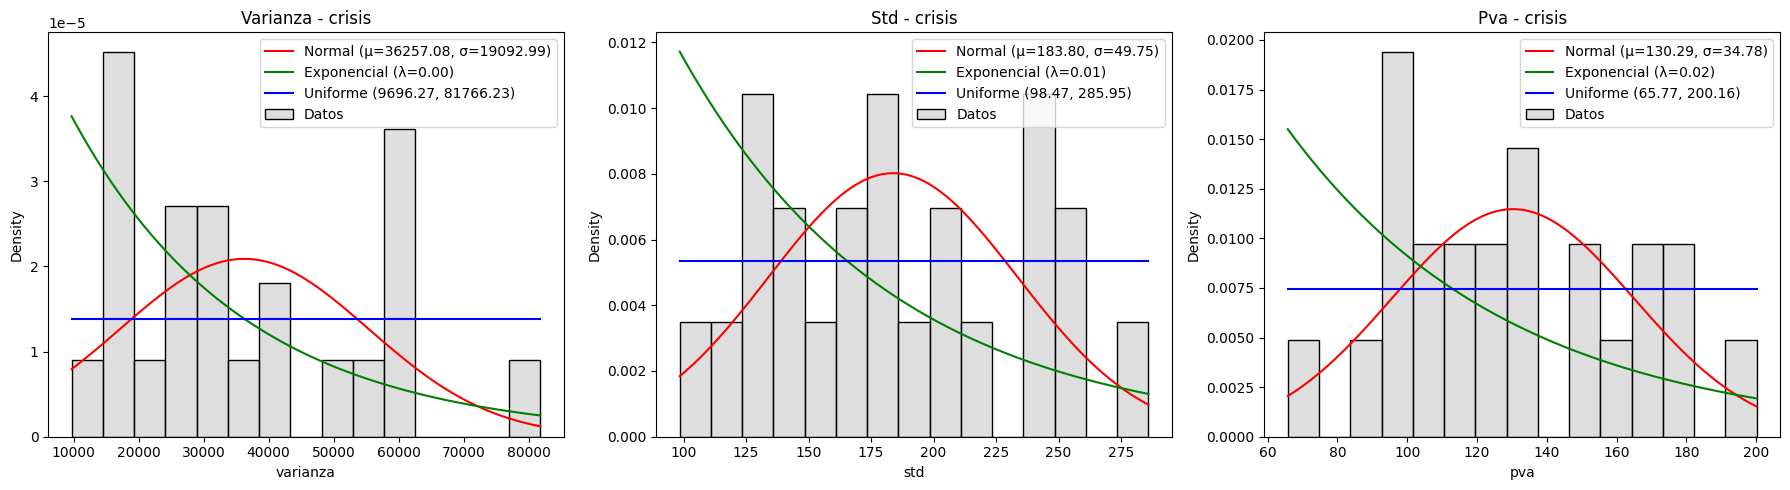

In [41]:
from scipy import stats

def ajustar_distribuciones(resultados, segmento="crisis"):
    descriptores = ["varianza", "std", "pva"]
    fig, axes = plt.subplots(1, 3, figsize=(18,5))

    for i, desc in enumerate(descriptores):
        data = resultados[resultados["segmento"]==segmento][desc]

        # Histograma base
        sns.histplot(data, kde=False, stat="density", bins=15,
                     color="lightgray", label="Datos", ax=axes[i])

        # Normal
        mu, sigma = stats.norm.fit(data)
        x = np.linspace(min(data), max(data), 100)
        axes[i].plot(x, stats.norm.pdf(x, mu, sigma), "r-",
                     label=f"Normal (μ={mu:.2f}, σ={sigma:.2f})")

        # Exponencial
        loc, scale = stats.expon.fit(data)
        axes[i].plot(x, stats.expon.pdf(x, loc, scale), "g-",
                     label=f"Exponencial (λ={1/scale:.2f})")

        # Uniforme
        loc, scale = stats.uniform.fit(data)
        axes[i].plot(x, stats.uniform.pdf(x, loc, scale), "b-",
                     label=f"Uniforme ({loc:.2f}, {loc+scale:.2f})")

        axes[i].set_title(f"{desc.capitalize()} - {segmento}")
        axes[i].legend()

    plt.tight_layout()
    plt.show()

# Uso con segmento "crisis"
ajustar_distribuciones(resultados, segmento="crisis")

###**Scatterplot de parámetros de PDF**

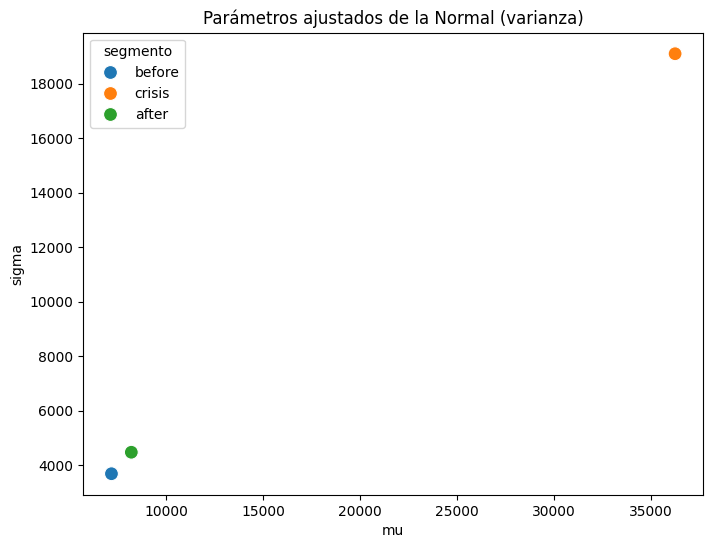

In [42]:
parametros = []

for seg in ["before", "crisis", "after"]:
    data = resultados[resultados["segmento"]==seg]["varianza"]
    mu, sigma = stats.norm.fit(data)
    parametros.append({"segmento": seg, "mu": mu, "sigma": sigma})

df_param = pd.DataFrame(parametros)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_param, x="mu", y="sigma", hue="segmento", s=100)
plt.title("Parámetros ajustados de la Normal (varianza)")
plt.show()

##**Escenario 2**

**Una señal completa.**

**Cálculo de descriptores en ventanas deslizantes.**

**Umbral automático para marcar la crisis.**

###**Concatenación de las tres partes en un solo bloque**

In [43]:
total = pd.concat([before_c, crisis_c, after_c])
print("Bloque total:", total.shape)

Bloque total: (84227, 23)


###**Función de ventana deslizante**

In [44]:
def ventana_deslizante(df, fs=256, ventana_seg=1):
    """
    Recorre un DataFrame (canales x tiempo) con ventana deslizante
    y calcula varianza, std y pva por canal en cada ventana.
    """
    ventana_muestras = ventana_seg * fs
    resultados = []

    for inicio in range(0, len(df), ventana_muestras):
        fin = inicio + ventana_muestras
        if fin > len(df):
            break
        sub_df = df.iloc[inicio:fin]

        # tiempo central de la ventana
        tiempo = np.mean(sub_df.index.values)

        for canal in df.columns:
            x = sub_df[canal]
            varianza = x.var()
            std = x.std()
            pva = np.mean(np.abs(x))
            resultados.append([tiempo, canal, varianza, std, pva])

    return pd.DataFrame(resultados, columns=["tiempo","canal","varianza","std","pva"])

###**Aplicación en bloque total**

In [45]:
res_total = ventana_deslizante(total, fs=256, ventana_seg=1)
print(res_total.head())

        tiempo   canal      varianza        std        pva
0  4498.498047  FP1-F7   3705.158145   60.87001  51.072182
1  4498.498047   F7-T7   9071.277768  95.243256  80.012078
2  4498.498047   T7-P7   2468.428597  49.683283  41.691528
3  4498.498047   P7-O1   4991.543663  70.650857  58.470308
4  4498.498047  FP1-F3  10568.680964  102.80409  83.865575


###**Graficar evolución. Ejemplo con la varianza de un canal**

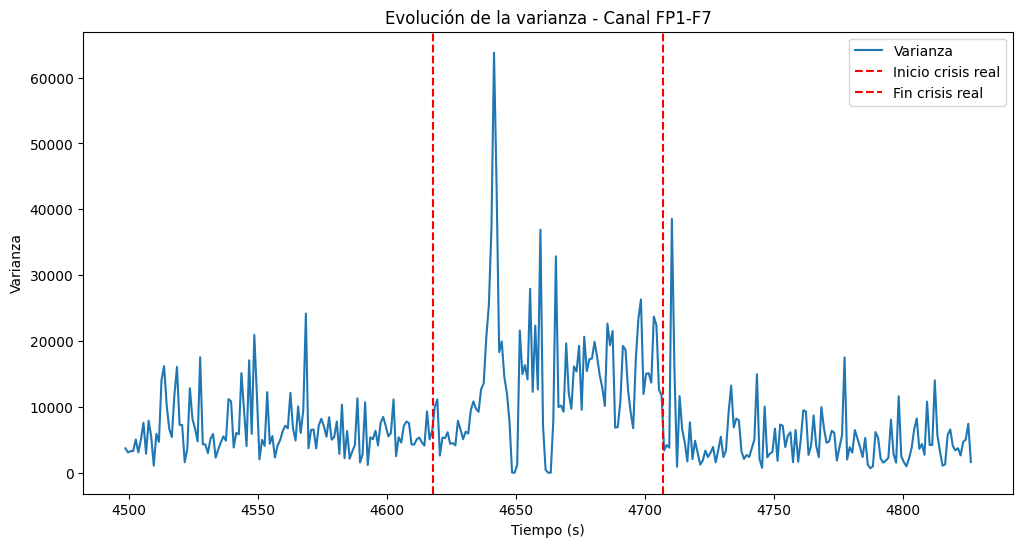

In [46]:
canal = total.columns[0]  # elegimos el primer canal

plt.figure(figsize=(12,6))
canal_data = res_total[res_total["canal"]==canal]
plt.plot(canal_data["tiempo"], canal_data["varianza"], label="Varianza")

# Marcar crisis real
plt.axvline(x=comienzo, color="red", linestyle="--", label="Inicio crisis real")
plt.axvline(x=final, color="red", linestyle="--", label="Fin crisis real")

plt.title(f"Evolución de la varianza - Canal {canal}")
plt.xlabel("Tiempo (s)")
plt.ylabel("Varianza")
plt.legend()
plt.show()

####**Marcar crisis real**

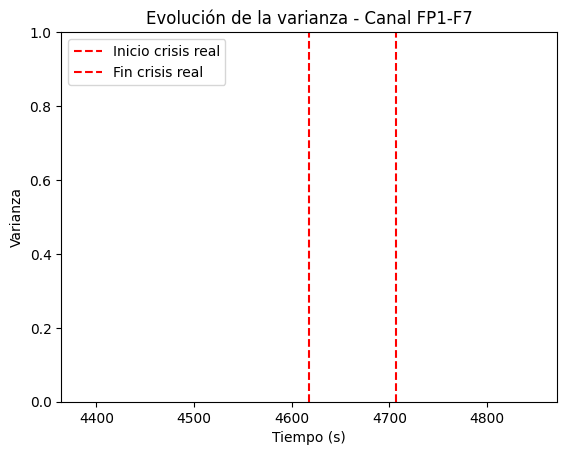

In [47]:
plt.axvline(x=comienzo, color="red", linestyle="--", label="Inicio crisis real")
plt.axvline(x=final, color="red", linestyle="--", label="Fin crisis real")

plt.title(f"Evolución de la varianza - Canal {canal}")
plt.xlabel("Tiempo (s)")
plt.ylabel("Varianza")
plt.legend()
plt.show()

###**Definir umbral a partir del escenario 1**

(varianza en crisis)

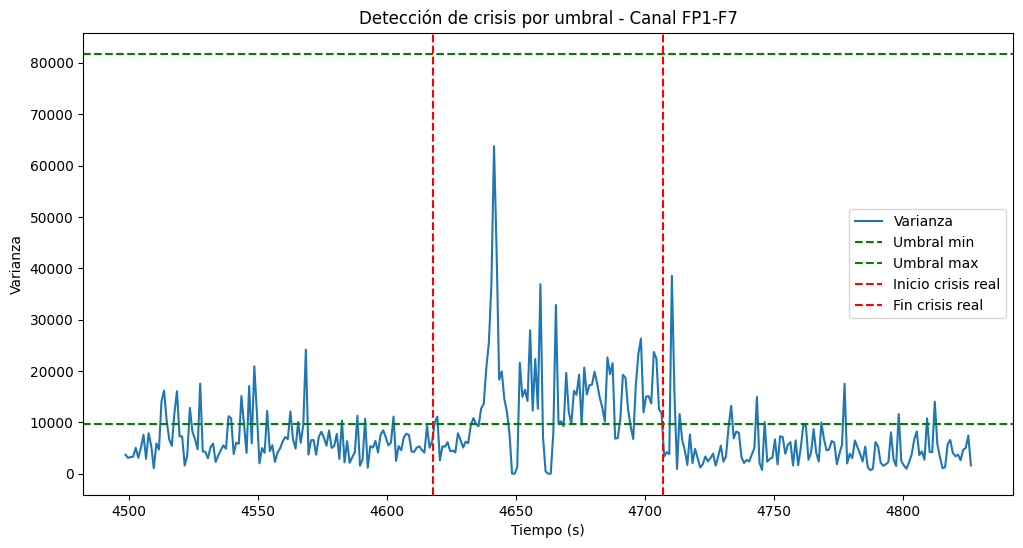

In [48]:
# Definimos umbral basado en la varianza en crisis
umbral_min = res_crisis["varianza"].min()
umbral_max = res_crisis["varianza"].max()

plt.figure(figsize=(12,6))
plt.plot(canal_data["tiempo"], canal_data["varianza"], label="Varianza")
plt.axhline(y=umbral_min, color="green", linestyle="--", label="Umbral min")
plt.axhline(y=umbral_max, color="green", linestyle="--", label="Umbral max")
plt.axvline(x=comienzo, color="red", linestyle="--", label="Inicio crisis real")
plt.axvline(x=final, color="red", linestyle="--", label="Fin crisis real")
plt.title(f"Detección de crisis por umbral - Canal {canal}")
plt.xlabel("Tiempo (s)")
plt.ylabel("Varianza")
plt.legend()
plt.show()

###**Calcular retardo de detección**

(primer cruce del umbral)

In [49]:
detecciones = canal_data[canal_data["varianza"] >= umbral_min]["tiempo"]
if not detecciones.empty:
    deteccion_inicio = detecciones.iloc[0]
    retardo = deteccion_inicio - comienzo
    print(f"Detección automática: {deteccion_inicio:.2f} s")
    print(f"Retardo de detección: {retardo:.2f} s")
else:
    print("No se detectó la crisis con el umbral definido.")

Detección automática: 4512.50 s
Retardo de detección: -105.50 s
